# 视觉与语言第一次作业

### 说明：本次作业满分100分。第一大题共5小题，每题10分，第二大题50分。

### **最终结果正确不代表得分为满分。请仔细阅读题目中说明！**

### 提交方式：只需要提交这个ipynb文件，命名为 名字_学号_hw01.ipynb

---



# Pytorch基础语法

## **题目1**

### **描述**

**输入**：给定一个形状为 `(N, C, H, W)` 的四维张量 `x`，其中 N 为样本数量，C 为通道数，H 和 W 为高和宽。请对 `x` 进行处理，实现以下功能：对每个样本的每个通道进行全局最大池化，得到一个形状为 `(N, C)` 的张量 `y`。

### **示例输入**

```python
x = torch.tensor([
    [
        [[1, 2], [3, 4]],
        [[5, 6], [7, 8]]
    ],
    [
        [[9, 10], [11, 12]],
        [[13, 14], [15, 16]]
    ]
])  # 形状为 (2, 2, 2, 2)
```

### **示例输出**

```python
y = torch.tensor([
    [4, 8],
    [12, 16]
])  # 形状为 (2, 2)
```


In [11]:
# 第一题
import torch

x = torch.tensor([
    [
        [[1, 2], [3, 4]],
        [[5, 6], [7, 8]]
    ],
    [
        [[9, 10], [11, 12]],
        [[13, 14], [15, 16]]
    ]
])  # 形状为 (2, 2, 2, 2)

# 请在此处完成全局最大池化操作
# 提示：需要对 H 和 W 维度进行最大化

y = x.max(dim=-1, keepdim=False)[0].max(dim=-1, keepdim=False)[0]
print(y)

tensor([[ 4,  8],
        [12, 16]])



---

## **题目2**

### **描述**

**输入**：给定两个形状均为 `(N, D)` 的张量 `x` 和 `y`，请计算它们之间的余弦相似度，得到形状为 `(N,)` 的张量 `scores`。

### **示例输入**

```python
x = torch.tensor([[1, 0], [0, 1]])
y = torch.tensor([[0, 1], [1, 0]])
```

### **示例输出**

```python
scores = torch.tensor([0.0, 0.0])
```



In [12]:
# 第二题
import torch

x = torch.tensor([[1, 0], [0, 1]], dtype=torch.float)
y = torch.tensor([[0, 1], [1, 0]], dtype=torch.float)

# 请在此处计算余弦相似度
# 提示：使用张量运算，不要使用 torch.nn.functional.cosine_similarity

scores = (x * y).sum(dim=-1) / (x.norm(dim=-1) * y.norm(dim=-1))

print(scores)


tensor([0., 0.])



---

## **题目3**

### **描述**

**输入**：给定一个形状为 `(N, D_in)` 的张量 `x`，需要通过一个两层的全连接神经网络（无激活函数）映射到形状为 `(N, D_out)` 的输出 `y`。第一层权重为 `w1`，形状为 `(D_in, H)`，第二层权重为 `w2`，形状为 `(H, D_out)`，其中 `H` 是隐藏层大小。

### **示例输入**

```python
x = torch.tensor([[1.0, 2.0]])
w1 = torch.tensor([[1.0, 0.0], [0.0, 1.0]])
w2 = torch.tensor([[1.0], [1.0]])
```

### **示例输出**

```python
y = torch.tensor([[3.0]])
```



In [13]:
# 第三题
import torch

x = torch.tensor([[1.0, 2.0]])
w1 = torch.tensor([[1.0, 0.0], [0.0, 1.0]])
w2 = torch.tensor([[1.0], [1.0]])

# 请在此处完成两层全连接神经网络的计算

y = x.mm(w1).mm(w2)

print(y)


tensor([[3.]])




## **题目4**

### **描述**

**输入**：给定一个形状为 `(N, C, H, W)` 的图像张量 `x`，请实现一个函数，对每个样本的每个通道进行 Depth-wise Separable Convolution 卷积操作及常规卷积操作，请自己实现这个函数的接口并做测试，**不使用** `torch.nn.Conv2d`。在下面比较它们的结果、参数量。

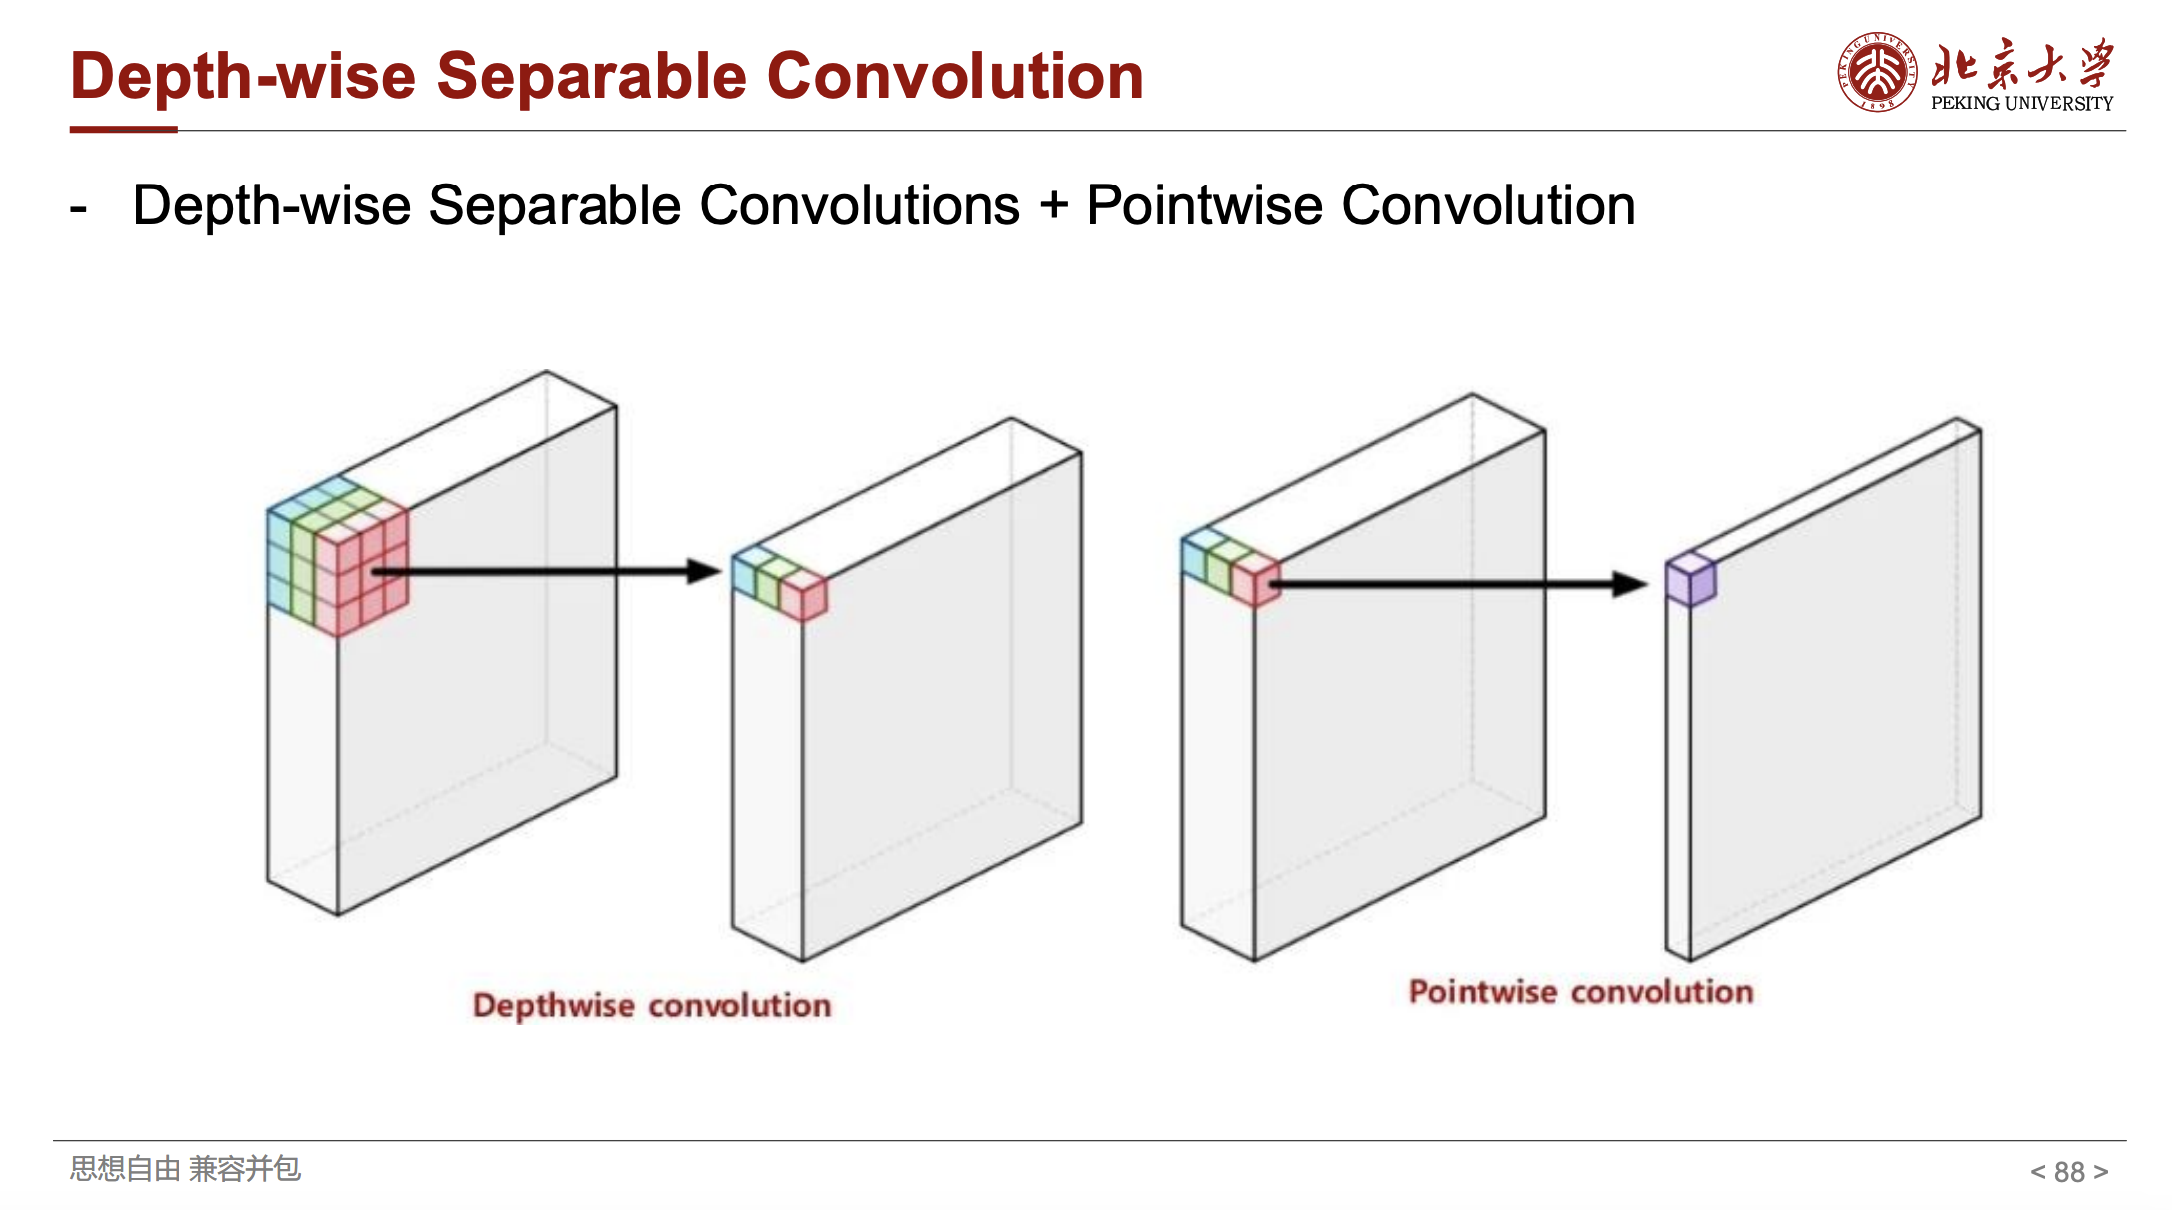
### **示例输入**


```python
x = torch.ones(1, 1, 3, 3)
kernel = torch.tensor([[[[1, 0], [0, -1]]]])
```

### **示例输出**

```python
y = torch.tensor([[[[0., 0.],
                    [0., 0.]]]])
```

### 仅仅是一个样例，请初始化不同的kernal与x，分别手动实现两种不同的卷积



In [28]:
# 第四题

import torch
import torch.nn.functional as F

x = torch.ones(1, 1, 3, 3)  # (batch_size, in_channels, H, W)
kernel = torch.tensor([[[[1, 0], [0, -1]]]])


# 请在此处实现 两种 卷积操作
# 提示：可以使用 F.conv2d，但需要正确处理输入和卷积核的形状
class DepthwiseConv2d(torch.nn.Module):
    def __init__(self, in_channels, kernel=None, kernel_size=None):
        super(DepthwiseConv2d, self).__init__()
        self.kernel = kernel if kernel is not None else torch.randn(in_channels, 1, kernel_size, kernel_size)
        self.groups = in_channels
        self.conv = F.conv2d

    def forward(self, x):
        return self.conv(input=x, weight=self.kernel, groups=self.groups)

class PointwiseConv2d(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel=None):
        super(PointwiseConv2d, self).__init__()
        self.kernel = kernel if kernel is not None else torch.randn(out_channels, in_channels, 1, 1)
        self.conv = F.conv2d

    def forward(self, x):
        return self.conv(input=x, weight=self.kernel)
    
class DepthwiseSeparableConv2d(torch.nn.Module):    # 深度可分离卷积
    def __init__(self, in_channels, out_channels, kernel):
        super(DepthwiseSeparableConv2d, self).__init__()
        self.depthwise = DepthwiseConv2d(in_channels, kernel=kernel)
        self.pointwise = PointwiseConv2d(in_channels, out_channels)

    def forward(self, x):
        return self.pointwise(self.depthwise(x))

class trivialConv2d(torch.nn.Module):   # 普通卷积
    def __init__(self, out_channels, kernel):
        super(trivialConv2d, self).__init__()
        self.conv = F.conv2d
        self.kernel = kernel
        self.out_channels = out_channels

    def forward(self, x):
        return self.conv(input=x, weight=self.kernel)
    
    
kernel = kernel.to(dtype=torch.float32) 
out_channels = 1 # TODO: 请设置输出通道数
# 深度可分离卷积
depthwise_conv2d = DepthwiseSeparableConv2d(in_channels=x.size(1), out_channels=out_channels, kernel=kernel)
y = depthwise_conv2d(x)
print("深度可分离卷积：y=",y)
# 普通卷积
trivial_conv2d = trivialConv2d(out_channels, kernel)
y = trivial_conv2d(x)
print("普通卷积：y=",y)

深度可分离卷积：y= tensor([[[[0., 0.],
          [0., 0.]]]])
普通卷积：y= tensor([[[[0., 0.],
          [0., 0.]]]])


### 请在这里比较两种不同的卷积

Your answer:
1. 深度可分离卷积和普通卷积的结果是一样的。
2. 深度可分离卷积参数量比普通卷积少。
假设输入单个特征图x的形状为$C_{in}\times H\times W$，输出特征图通道数为$C_{out}$。假设kernel_size都是$D_k$。
- 普通卷积的参数量：$ C_{out} * C_{in} * D_k * D_k $
- 深度可分离卷积的参数量：首先depthwise conv参数量$C_{in} * (D_k * D_k * 1)$；其次，pointwise conv参数量$C_{out} * (1 * 1 * C_{in})$。所以总参数量为$C_{in} * (D_k * D_k + C_{out})$

$\frac{深度可分离卷积的参数量}{普通卷积的参数量}=\frac{1}{D_k^2} + \frac{1}{C_{out}}$


---

## **题目5**

### **描述**

**输入**：给定一个形状为 `(N, D)` 的张量 `x`，请实现一个 Batch Normalization 的前向计算，**不使用** `torch.nn.BatchNorm1d`，计算归一化后的输出 `y`。

### **示例输入**

```python
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
gamma = torch.tensor([1.0, 1.0])
beta = torch.tensor([0.0, 0.0])
```

### **示例输出**

```python
y = torch.tensor([[-1.0, -1.0],
                  [1.0, 1.0]])
```


In [49]:
# 第五题

import torch

x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
gamma = torch.tensor([1.0, 1.0])
beta = torch.tensor([0.0, 0.0])

# 请在此处实现 Batch Normalization 前向计算
class BatchNorm(torch.nn.Module):
    def __init__(self, gamma, beta, sigma=None):
        super(BatchNorm, self).__init__()
        self.gamma = gamma
        self.beta = beta
        self.sigma = 1e-5 if sigma is None else sigma
    
    def forward(self, x: torch.Tensor):
        mean = x.mean(dim=0, keepdim=True)  # 每一个特征通道上面的均值，所以在batch纬度进行均值计算
        variance = (x - mean).pow(2).mean(dim=0, keepdim=True)
        x_hat = (x - mean) / torch.sqrt(variance + self.sigma)
        return self.gamma * x_hat + self.beta

BN = BatchNorm(gamma, beta)
bn = torch.nn.BatchNorm1d(2, affine=False)
# t = bn(x)
# print(t)
y = BN(x)

print(y)







tensor([[-1.0000, -1.0000],
        [ 1.0000,  1.0000]])





# 二、神经网络初探

## 本部分共计50分。

在PyTorch教程中展示了如何使用torchvision库来加载常见的数据集，比如MNIST。在这个练习中，我们为你提供了一堆图片（CIFAR），你需要阅读[这个教程](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)及相关资料，了解Dataloader的相关内容，并找到适合读取CIFAR10的Dataloader。

**说明：**

- 请从[这里](https://www.cs.toronto.edu/~kriz/cifar.html)下载数据。在给定的zip文件中有两个目录，一个用于训练样本，一个用于测试。在每个目录中，有10个子目录，每个子目录包含属于该类别的图片。结构如下：

  cifar10_train/airplane/airplane_00001.png

  cifar10_train/airplane/airplane_00002.png

  ... ...

  cifar10_train/truck/truck_04999.png

  cifar10_test/airplane/airplane_00001.png

  cifar10_test/airplane/airplane_00002.png

  ... ...

  cifar10_test/truck/truck_00999.png



接下来，你需要在PyTorch中实现一个3层的MLP模型（一个输入层，一个带有tanh激活函数的隐藏层，和一个输出层），命名为MultiLayerPerceptronModel，它将用于通过Dataloader集中的图片进行分类。

你可以使用PyTorch中内置的模块来构建你的模型，比如Linear, Dropout, Tanh等。

你还需要编写训练函数（training），并探索以下超参数设置：

- 批量大小：每次训练迭代的样本数量。

- 隐藏层大小：尝试使用不同数量的隐藏节点在你的模型中，并比较性能。

- Dropout：Dropout是一种有效的防止过拟合的策略。在隐藏层之后添加一个dropout层，并尝试使用不同的dropout率来比较性能。

- 优化器：尝试使用不同的优化器，比如SGD, Adam, RMSProp。

- 正则化（权重衰减）：L2正则化可以通过设置优化器中的_weight_decay_参数来指定。尝试使用不同的正则化因子，并检查性能。

- 学习率，学习率调度器：学习率是模型训练中的关键超参数，你可以通过逐渐降低学习率来进一步改进你的模型。尝试使用不同的学习率和不同的学习率调度器来比较性能。

你应该至少实验4种不同类型的超参数，并为每个超参数选择至少3个不同的值。为了简单起见，你可以一次分析一个超参数（即固定所有其他合理的值），而不是执行网格搜索。

为了评估训练模型的性能，你还需要编写一个函数（evaluation），它加载训练好的模型，并在训练/测试集上评估其性能。在你的报告中，请清楚地说明你探索了哪些超参数，以及模型在训练/测试集上达到了多少准确率。

#### **注意：在下面的报告中必须体现：不同参数下的训练准确率、测试准确率、损失loss的值、epoch-loss的图像、epoch-accuracy图像（自己使用tensorboard或传统plot函数来实现）**




Files already downloaded and verified
Files already downloaded and verified
Epoch 0, iter 0, loss=2.304342269897461
Epoch 0, iter 100, loss=2.238352060317993
Epoch 0, iter 200, loss=2.1692371368408203
Epoch 0, iter 300, loss=2.19560170173645
Epoch 0, iter 400, loss=2.163419246673584
Epoch 0, iter 500, loss=2.1211836338043213
Epoch 0, iter 600, loss=2.166891098022461
Epoch 0, iter 700, loss=2.1302154064178467
Epoch 1, iter 0, loss=2.178312301635742
Epoch 1, iter 100, loss=2.21278715133667
Epoch 1, iter 200, loss=2.1866190433502197
Epoch 1, iter 300, loss=2.0959134101867676
Epoch 1, iter 400, loss=2.1341018676757812
Epoch 1, iter 500, loss=2.041407346725464
Epoch 1, iter 600, loss=2.1249990463256836
Epoch 1, iter 700, loss=2.120239496231079
Epoch 2, iter 0, loss=2.0964691638946533
Epoch 2, iter 100, loss=2.0888397693634033
Epoch 2, iter 200, loss=2.116530179977417
Epoch 2, iter 300, loss=2.0956342220306396
Epoch 2, iter 400, loss=2.0401291847229004
Epoch 2, iter 500, loss=2.0378956794738

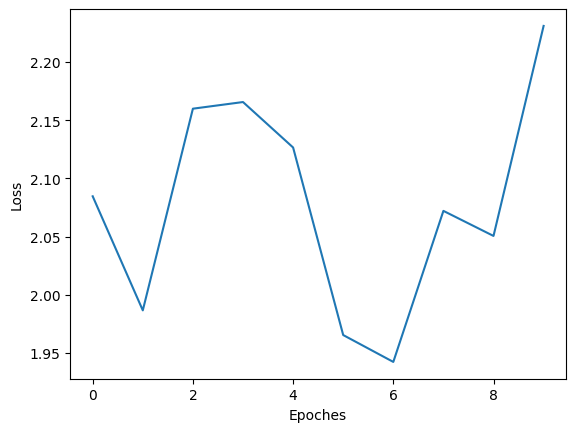

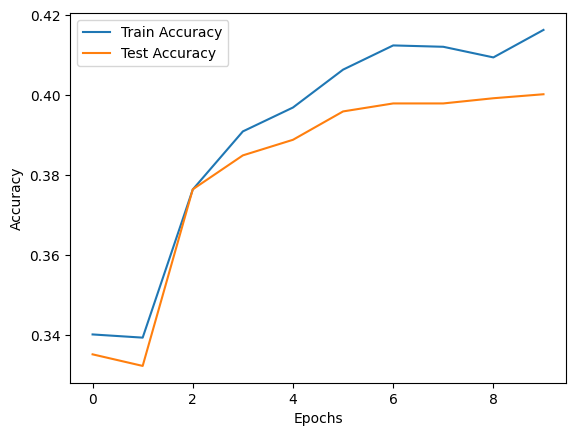

In [5]:
# 你的第二大题（神经网络初探）的代码：
import torch
import matplotlib.pyplot as plt
# step0: args
args = {
    'batch_size': 64,   # 32, 64， 128
    'epoch': 10,
    'lr': 1e-4, # 1e-3, 1e-4, 1e-5
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'weight_decay': 1e-5,
    'hidden_dim': 128,  # 64, 128, 256
    'dropout': 0.5,
    'optimizer': 'rmsprop', # 'sgd', 'adam', 'rmsprop'
}
cifar_path = './cifar-10-batches-py'


# step1: dataloader 找到适合cifar10的数据集dataloader
from torchvision import datasets, transforms
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
# 通过DataLoader加载数据
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=args['batch_size'], shuffle=True)
test_loader = DataLoader(test_set, batch_size=args['batch_size'], shuffle=False)

# step2: NN model
import torch.nn as nn
class MultiLayerPerceptronModel(nn.Module):
    def __init__(self, input_size=32, channels=3, num_class=10, hidden_dim=128, dropout=0.5):
        super(MultiLayerPerceptronModel, self).__init__()
        # input layer
        self.fc1 = nn.Linear(input_size*input_size*channels, hidden_dim)
        # hidden layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # output layer
        self.fc3 = nn.Linear(hidden_dim, num_class)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=-1)
        self.dropout = nn.Dropout(dropout)
        
        
    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = self.tanh(self.fc1(x))  # 输入层
        x = self.tanh(self.fc2(x))  # 中间层
        x = self.fc3(x) # 输出层
        return self.softmax(x)  # 输出层激活函数用于分类

model = MultiLayerPerceptronModel(hidden_dim=args['hidden_dim'], dropout=args['dropout'])
# step3: loss function
loss = nn.CrossEntropyLoss()

# step4: optimizer
if args['optimizer'] == 'sgd':
    optim = torch.optim.SGD(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
elif args['optimizer'] == 'adam':
    optim = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
elif args['optimizer'] == 'rmsprop':
    optim = torch.optim.RMSprop(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
else:
    raise ValueError('optimizer is not defined')

# step5: eval
def eval(model, test_loader, args):
    model.eval()
    if args['device'] == 'cuda':
        model.cuda()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            if args['device'] == 'cuda':
                data, target = data.cuda(), target.cuda()
            output = model(data)
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return correct / total

# step6: train
def train(model, train_loader, test_loader, loss, optim, args):
    model.train()
    if args['device'] == 'cuda':
        model.cuda()
    losses = []
    accs_train = []
    accs_test = []
    for epoch in range(args['epoch']):
        for i, (data, target) in enumerate(train_loader):
            loss_lst = []
            if args['device'] == 'cuda':
                data, target = data.cuda(), target.cuda()
            optim.zero_grad()   # 梯度清零
            output = model(data)    # 前向传播
            loss_value = loss(output, target)   # 计算损失
            
            loss_value.backward()   # 反向传播
            optim.step()    # 更新参数
            if i % 100 == 0:
                print(f"Epoch {epoch}, iter {i}, loss={loss_value.item()}")
            loss_lst.append(loss_value.item())
        losses.append(sum(loss_lst)/len(loss_lst))
        acc_train = eval(model, train_loader, args)
        acc_test = eval(model, test_loader, args)
        accs_train.append(acc_train)
        accs_test.append(acc_test)
    return losses, accs_train, accs_test

losses, accs_train, accs_test = train(model, train_loader, test_loader, loss, optim, args)
print("测试损失为：", losses[-1])
print("训练准确率为：", accs_train[-1])
print("测试准确率为：", accs_test[-1])
# step7: plot
plt.plot(losses)
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.savefig(f"plots/loss-epoch-bs-{args['batch_size']}-lr-{args['lr']}-hiddim-{args['hidden_dim']}-optim-{args['optimizer']}.png")  # 保存图片
plt.show()

plt.plot(accs_train, label='Train Accuracy')
plt.plot(accs_test, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"plots/acc-epoch-bs-{args['batch_size']}-lr-{args['lr']}-hiddim-{args['hidden_dim']}-optim-{args['optimizer']}.png")
plt.show()

# step8: save model
# model.save(f"ckpts/model-bs-{args['batch_size']}-lr-{args['lr']}-hiddim-{args['hidden_dim']}-optim-{args['optimizer']}.pth")  
# torch.save(model.state_dict(), f"ckpts/model-bs-{args['batch_size']}-lr-{args['lr']}-hiddim-{args['hidden_dim']}-optim-{args['optimizer']}.pth") # TODO: 保存模型


# 你的第二大题（神经网络初探）的报告：

# 实验设置
在本实验中，主要尝试了四种类型超参数设置
1.lr,标准设置为1e-4,测试范围为1e-3, 1e-4, 1e-5
2.batch_size,标准设置为64,测试范围为32, 64, 128
3.hidden_dim,标准设置为128,测试范围为64, 128, 256
4.optimizer,标准设置为adam,测试范围为sgd, adam, rmsprop

注意，下面的各个部分除了需要探究的超参数外，其他超参数均为上述标准设置。

# 学习率lr的影响
设置lr=1e-3时

测试loss为：2.1766929626464844

训练准确率为：0.33194

测试准确率为：0.328

![loss-epoch曲线，lr=1e-3](plots/loss-epoch-bs-64-lr-0.001-hiddim-128-optim-adam.png)

![acc-epoch曲线，lr=1e-3](plots/acc-epoch-bs-64-lr-0.001-hiddim-128-optim-adam.png)

设置lr=1e-4时

测试loss为：1.9974234104156494

训练准确率为：0.45044

测试准确率为：0.4326

![loss-epoch曲线，lr=1e-4](plots/loss-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)

![acc-epoch曲线，lr=1e-4](plots/acc-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)


设置lr=1e-5时

测试loss为：1.9761923551559448

训练准确率为： 0.3469

测试准确率为： 0.3485

![loss-epoch曲线，lr=1e-5](plots/loss-epoch-bs-64-lr-1e-05-hiddim-128-optim-adam.png)

![acc-epoch曲线，lr=1e-5](plots/acc-epoch-bs-64-lr-1e-05-hiddim-128-optim-adam.png)

# batch_size的影响
设置bs=32时

测试损失为： 2.002385377883911

训练准确率为： 0.4639

测试准确率为： 0.443

![loss-epoch曲线，bs=32](plots/loss-epoch-bs-32-lr-0.0001-hiddim-128-optim-adam.png)

![acc-epoch曲线，bs=32](plots/acc-epoch-bs-32-lr-0.0001-hiddim-128-optim-adam.png)

设置bs=64时

测试loss为：1.9974234104156494

训练准确率为：0.45044

测试准确率为：0.4326

![loss-epoch曲线，bs=64](plots/loss-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)

![acc-epoch曲线，bs=64](plots/acc-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)

设置bs=128时

测试损失为： 2.0432918071746826

训练准确率为： 0.4305

测试准确率为： 0.4189

![loss-epoch曲线，bs=128](plots/loss-epoch-bs-128-lr-0.0001-hiddim-128-optim-adam.png)

![acc-epoch曲线，bs=128](plots/acc-epoch-bs-128-lr-0.0001-hiddim-128-optim-adam.png)

# hidden_dim的影响
设置hidden_dim=64时

测试损失为： 2.0021419525146484

训练准确率为： 0.42912

测试准确率为： 0.4157

![loss-epoch曲线，hidden_dim=64](plots/loss-epoch-bs-64-lr-0.0001-hiddim-64-optim-adam.png)

![acc-epoch曲线，hidden_dim=64](plots/acc-epoch-bs-64-lr-0.0001-hiddim-64-optim-adam.png)


设置hidden_dim=128时

设置bs=64时

测试loss为：1.9974234104156494

训练准确率为：0.45044

测试准确率为：0.4326

![loss-epoch曲线，hidden_dim=128](plots/loss-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)

![acc-epoch曲线，hidden_dim=128](plots/acc-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)

设置hidden_dim=256时

测试损失为： 1.9061784744262695

训练准确率为： 0.46054

测试准确率为： 0.4379

![loss-epoch曲线，hidden_dim=256](plots/loss-epoch-bs-64-lr-0.0001-hiddim-256-optim-adam.png)

![acc-epoch曲线，hidden_dim=256](plots/acc-epoch-bs-64-lr-0.0001-hiddim-256-optim-adam.png)

# 优化器的影响
设置优化器=adam时

测试loss为：1.9974234104156494

训练准确率为：0.45044

测试准确率为：0.4326

![loss-epoch曲线，优化器=adam](plots/loss-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)

![acc-epoch曲线，优化器=adam](plots/acc-epoch-bs-64-lr-0.0001-hiddim-128-optim-adam.png)

设置优化器=sgd时

测试损失为： 2.303501605987549

训练准确率为： 0.10338

测试准确率为： 0.1026

![loss-epoch曲线，优化器=sgd](plots/loss-epoch-bs-64-lr-0.0001-hiddim-128-optim-sgd.png)

![acc-epoch曲线，优化器=sgd](plots/acc-epoch-bs-64-lr-0.0001-hiddim-128-optim-sgd.png)

设置优化器=rmsprop时

测试损失为： 2.2311220169067383

训练准确率为： 0.4163

测试准确率为： 0.4002

![loss-epoch曲线，优化器=rmsprop](plots/loss-epoch-bs-64-lr-0.0001-hiddim-128-optim-rmsprop.png)

![acc-epoch曲线，优化器=rmsprop](plots/acc-epoch-bs-64-lr-0.0001-hiddim-128-optim-rmsprop.png)